In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Load CSV File
df=pd.read_csv("study_performance.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
print(df['gender'].value_counts())

female    518
male      482
Name: gender, dtype: int64


In [7]:
for column in df.columns:
    print(f"Value counts for column {column} :")
    print(df[column].value_counts().head())
    print()

Value counts for column gender :
female    518
male      482
Name: gender, dtype: int64

Value counts for column race_ethnicity :
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

Value counts for column parental_level_of_education :
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
Name: parental_level_of_education, dtype: int64

Value counts for column lunch :
standard        645
free/reduced    355
Name: lunch, dtype: int64

Value counts for column test_preparation_course :
none         642
completed    358
Name: test_preparation_course, dtype: int64

Value counts for column math_score :
65    36
62    35
69    32
59    32
61    27
Name: math_score, dtype: int64

Value counts for column reading_score :
72    34
74    33
64    32
67    30
73    30
Name: reading_score, dtype: int64

Value counts for column writing_score :
74    35
70    33
68    

# Data Cleaning and preprocessing:
    1) Check for missing values and how to handle them
    2) Check for any inconsitencies or error in data
    3) Differenciate numericsl and categorical data
    4) Rename the columns if necessary

#  Handling missing values and duplicate values

In [8]:
# Check Missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Check dtype and null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
# Checking the unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Exploring the data

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [14]:
print("Gender in data is : ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable is : ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_education variable is : ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable is :",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable is :",end=" ")
print(df['test_preparation_course'].unique())

print("Categories in 'math_score' variable is :",end=" ")
print(df['math_score'].unique())

print("Categories in  'reading_score' variable is :",end=" ")
print(df['reading_score'].unique())

print("Categories in 'writing_score variable' is :",end=" ")
print(df['writing_score'].unique())

Gender in data is :  ['female' 'male']
Categories in 'race_ethnicity' variable is :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_education variable is :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable is : ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable is : ['none' 'completed']
Categories in 'math_score' variable is : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in  'reading_score' variable is : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80


In [15]:
gp = df.groupby("parental_level_of_education").agg ({
    'math_score' : "mean",
    'reading_score'  : "mean",
    'writing_score' : "mean"
    
})
gp

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [16]:
my_df=pd.DataFrame({"Column_name":list(df.columns)})
my_df

,Column_name
0,gender
1,race_ethnicity
2,parental_level_of_education
3,lunch
4,test_preparation_course
5,math_score
6,reading_score
7,writing_score


In [17]:
col=list(df.columns)
col

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [18]:
# defining the numerical & categorical columns
d={}
for i in col:
    d[i]=df[i].nunique()

d

{'gender': 2,
 'race_ethnicity': 5,
 'parental_level_of_education': 6,
 'lunch': 2,
 'test_preparation_course': 2,
 'math_score': 81,
 'reading_score': 72,
 'writing_score': 77}

In [19]:
categorical=[]
Numerical=[]
for i,j in d.items():
    if j>6:
        Numerical.append(i)
    else:
        categorical.append(i)

In [20]:
print("\n Categorical Data :\t")
categorical


 Categorical Data :	


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [21]:
print("Numerical Data : \t")
Numerical

Numerical Data : 	


['math_score', 'reading_score', 'writing_score']

In [22]:
summary_statistics=df[Numerical].describe()
summary_statistics

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
for column in categorical:
    frequency_counts = df[column].value_counts()
    print(f"\nFrequency counts for {column}:")
    print(frequency_counts)


Frequency counts for gender:
female    518
male      482
Name: gender, dtype: int64

Frequency counts for race_ethnicity:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

Frequency counts for parental_level_of_education:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

Frequency counts for lunch:
standard        645
free/reduced    355
Name: lunch, dtype: int64

Frequency counts for test_preparation_course:
none         642
completed    358
Name: test_preparation_course, dtype: int64


# Question 1:- Is there a significant difference in performance between male and female students? 

In [24]:
from scipy import stats


male_scores = df[df['gender'] == 'male']
female_scores = df[df['gender'] == 'female']


subjects = ['math_score', 'reading_score', 'writing_score']
for subject in subjects:
    t_statistic, p_value = stats.ttest_ind(male_scores[subject], female_scores[subject])
    print(f"For {subject}:")
    print(f"   t-statistic: {t_statistic}")
    print(f"   p-value: {p_value}")
    if p_value < 0.05:
        print("   There is a significant difference in performance between male and female students.")
    else:
        print("   There is no significant difference in performance between male and female students.")


For math_score:
   t-statistic: 5.383245869828983
   p-value: 9.120185549328822e-08
   There is a significant difference in performance between male and female students.
For reading_score:
   t-statistic: -7.959308005187657
   p-value: 4.680538743933289e-15
   There is a significant difference in performance between male and female students.
For writing_score:
   t-statistic: -9.979557910004507
   p-value: 2.019877706867934e-22
   There is a significant difference in performance between male and female students.


# Question 2:- What is the total score and average score for each subject ?

In [25]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
reading_full = df[df['reading_score'] ==100]['average'].count()
writing_full = df[df['writing_score'] ==100]['average'].count()
math_full = df[df['math_score'] ==100]['average'].count()

print(f"Number of students with full marks in Maths : {math_full}")
print(f"Number of students with full marks in Writing : {writing_full}")
print(f"Number of students with full marks in Reading : {reading_full}")

Number of students with full marks in Maths : 7
Number of students with full marks in Writing : 14
Number of students with full marks in Reading : 17


In [27]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Question 3:- Relation between gender and race_ethnicity 

<Axes: xlabel='gender,race_ethnicity'>

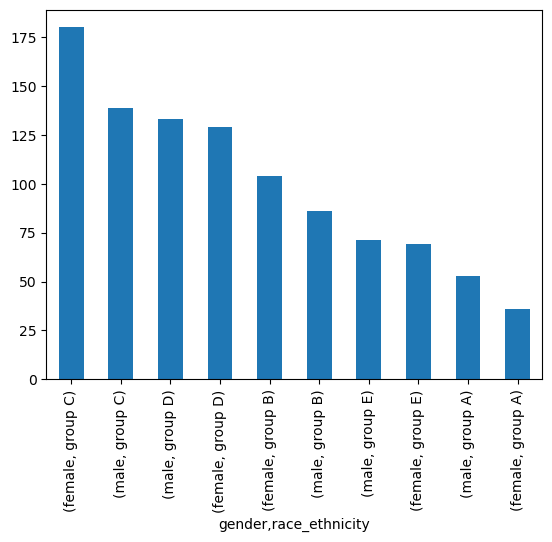

In [28]:
df[["gender",'race_ethnicity']].value_counts().plot(kind="bar")

# Question 4:- What are the mean, median, minimum, and maximum scores for math, reading, and writing?

In [29]:
# method 1
mean_scores = df[['math_score', 'reading_score', 'writing_score']].mean()
median_scores = df[['math_score', 'reading_score', 'writing_score']].median()
min_scores = df[['math_score', 'reading_score', 'writing_score']].min()
max_scores = df[['math_score', 'reading_score', 'writing_score']].max()

print("Mean Scores :\n")
print(mean_scores,"\n")
print("Median Scores :\n")
print(median_scores,"\n")
print("Minimum Scores :\n")
print(min_scores,"\n")
print("Maximun Scores: \n")
print(max_scores)

Mean Scores :

math_score       66.089
reading_score    69.169
writing_score    68.054
dtype: float64 

Median Scores :

math_score       66.0
reading_score    70.0
writing_score    69.0
dtype: float64 

Minimum Scores :

math_score        0
reading_score    17
writing_score    10
dtype: int64 

Maximun Scores: 

math_score       100
reading_score    100
writing_score    100
dtype: int64


In [30]:
#method 2
df.describe()

,math_score,reading_score,writing_score,Total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


# Question5 :- Are there differences in performance among students with parents having different education levels?

In [31]:
grouped_by_education=df.groupby("parental_level_of_education")

avg_math_score={}
avg_reading_score={}
avg_writing_score={}

for education_level, group_data in grouped_by_education:
    avg_math_score[education_level]= group_data["math_score"].mean()
    avg_reading_score[education_level]= group_data["reading_score"].mean()
    avg_writing_score[education_level]= group_data["writing_score"].mean()

print("Average scores by Parental Educatin Level :")
for education_level in avg_math_score:
    print(f"\n Parental Education Level :{education_level}")
    print(f" Math Scores : {avg_math_score[education_level]}")
    print(f" Reading Scores : {avg_reading_score[education_level]}")
    print(f" Writing Scores : {avg_writing_score[education_level]}")

Average scores by Parental Educatin Level :

 Parental Education Level :associate's degree
 Math Scores : 67.88288288288288
 Reading Scores : 70.92792792792793
 Writing Scores : 69.8963963963964

 Parental Education Level :bachelor's degree
 Math Scores : 69.38983050847457
 Reading Scores : 73.0
 Writing Scores : 73.38135593220339

 Parental Education Level :high school
 Math Scores : 62.13775510204081
 Reading Scores : 64.70408163265306
 Writing Scores : 62.44897959183673

 Parental Education Level :master's degree
 Math Scores : 69.7457627118644
 Reading Scores : 75.37288135593221
 Writing Scores : 75.67796610169492

 Parental Education Level :some college
 Math Scores : 67.1283185840708
 Reading Scores : 69.46017699115045
 Writing Scores : 68.84070796460178

 Parental Education Level :some high school
 Math Scores : 63.497206703910614
 Reading Scores : 66.93854748603351
 Writing Scores : 64.88826815642459


# Question6 :- How do the scores vary across different racial or ethnic groups?

In [32]:
grouped_by_race = df.groupby('race_ethnicity')

# Initialize dictionaries to store summary statistics for each subject
race_scores_summary = {}

# Calculate summary statistics for each subject for each race/ethnicity
for race, group_data in grouped_by_race:
    race_scores_summary[race] = {
        'Math': {
            'Mean': group_data['math_score'].mean(),
            'Median': group_data['math_score'].median(),
            'Std': group_data['math_score'].std()
        },
        'Reading': {
            'Mean': group_data['reading_score'].mean(),
            'Median': group_data['reading_score'].median(),
            'Std': group_data['reading_score'].std()
        },
        'Writing': {
            'Mean': group_data['writing_score'].mean(),
            'Median': group_data['writing_score'].median(),
            'Std': group_data['writing_score'].std()
        }
    }

# Print the summary statistics for each subject for each racial/ethnic group
print("Summary Statistics of Scores by Racial/Ethnic Group:")
for race in race_scores_summary:
    print(f"\nRacial/Ethnic Group: {race}")
    for subject in ['Math', 'Reading', 'Writing']:
        print(f"  {subject} Scores:")
        print(f"    Mean: {race_scores_summary[race][subject]['Mean']}")
        print(f"    Median: {race_scores_summary[race][subject]['Median']}")
        print(f"    Standard Deviation: {race_scores_summary[race][subject]['Std']}")


Summary Statistics of Scores by Racial/Ethnic Group:

Racial/Ethnic Group: group A
  Math Scores:
    Mean: 61.62921348314607
    Median: 61.0
    Standard Deviation: 14.52300840865962
  Reading Scores:
    Mean: 64.67415730337079
    Median: 64.0
    Standard Deviation: 15.543761742620026
  Writing Scores:
    Mean: 62.674157303370784
    Median: 62.0
    Standard Deviation: 15.468277862141896

Racial/Ethnic Group: group B
  Math Scores:
    Mean: 63.45263157894737
    Median: 63.0
    Standard Deviation: 15.468191236472933
  Reading Scores:
    Mean: 67.35263157894737
    Median: 67.0
    Standard Deviation: 15.177498954690543
  Writing Scores:
    Mean: 65.6
    Median: 67.0
    Standard Deviation: 15.625173014915122

Racial/Ethnic Group: group C
  Math Scores:
    Mean: 64.46394984326018
    Median: 65.0
    Standard Deviation: 14.852665879253692
  Reading Scores:
    Mean: 69.10344827586206
    Median: 71.0
    Standard Deviation: 13.99703317698206
  Writing Scores:
    Mean: 67.8

# Question7 :- Is there any correlation between race/ethnicity and parental education level?

In [33]:
from scipy.stats import chi2_contingency

# Assuming your DataFrame is named df

# Create a contingency table of race/ethnicity vs parental education level
contingency_table = pd.crosstab(df['race_ethnicity'], df['parental_level_of_education'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test of Independence:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant association between race/ethnicity and parental education level.")
else:
    print("There is no significant association between race/ethnicity and parental education level.")


Chi-Square Test of Independence:
Chi-Square Statistic: 29.45866151909779
P-value: 0.07911304840592065
There is no significant association between race/ethnicity and parental education level.


# Data Visualization

# Exploratory Data Analysis (EDA):
    1) Visualize the distributions of numeric variables (e.g., math_score, reading_score, writing_score) using histograms, box plots, or violin plots to understand their central tendency, spread, and presence of outliers.
    2) Explore relationships between variables using scatter plots or pair plots to identify potential correlations or patterns.
    3) Visualize the distributions of categorical variables (e.g., gender, race_ethnicity) using bar plots or pie charts to understand the composition of the dataset.
    4) Calculate summary statistics (e.g., mean, median, mode) for numeric variables and frequency counts for categorical variables to gain insights into the dataset's characteristics.

In [34]:
numeric_columns = ['math_score', 'reading_score', 'writing_score']
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


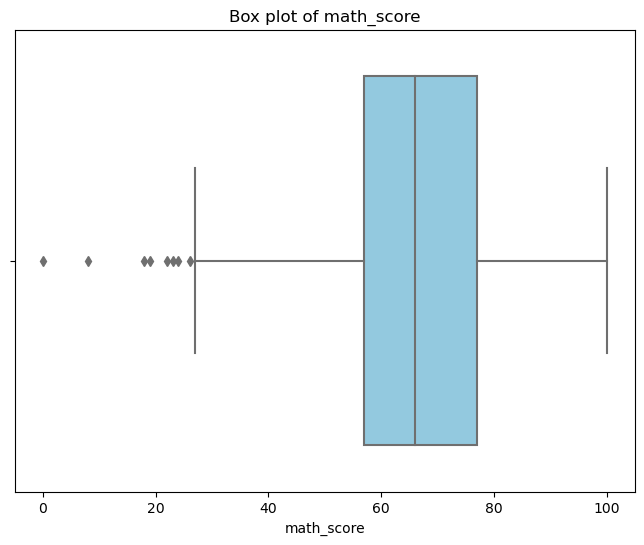

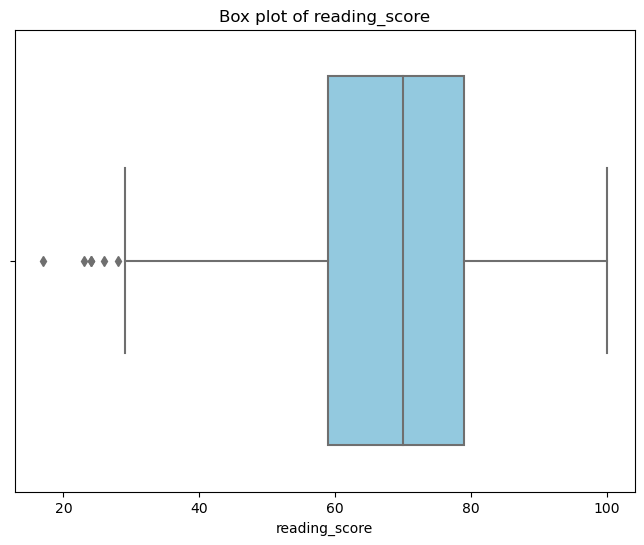

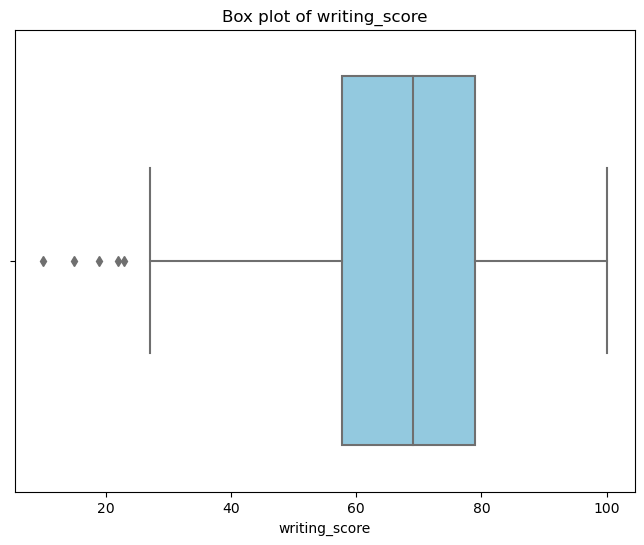

In [35]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='skyblue')  # Use x instead of y for boxplot
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

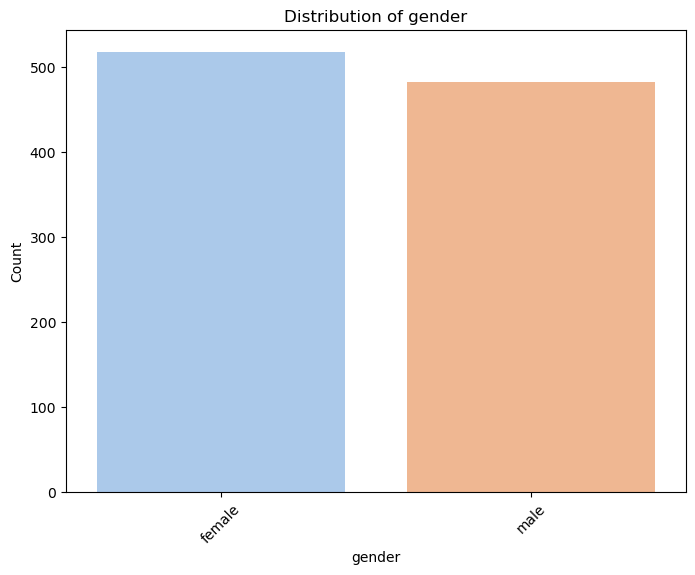

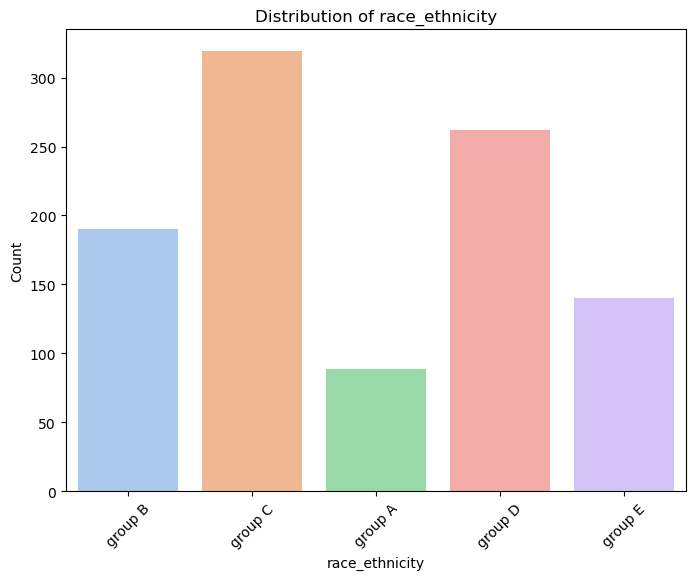

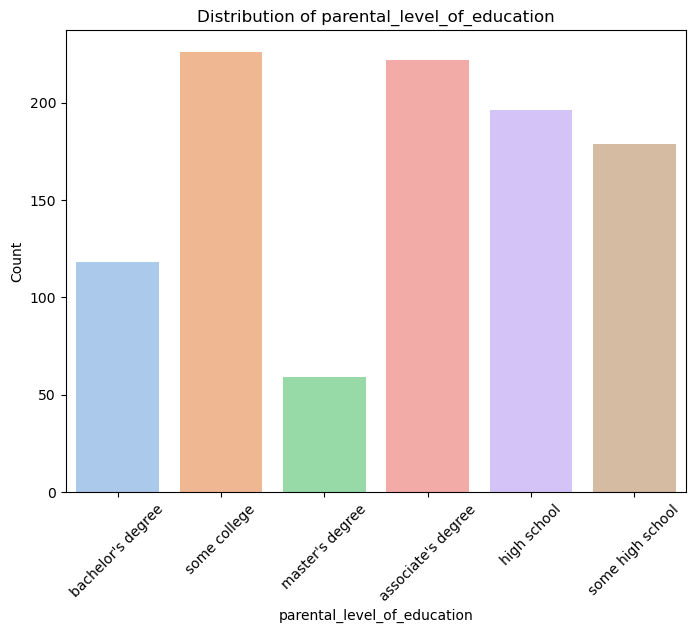

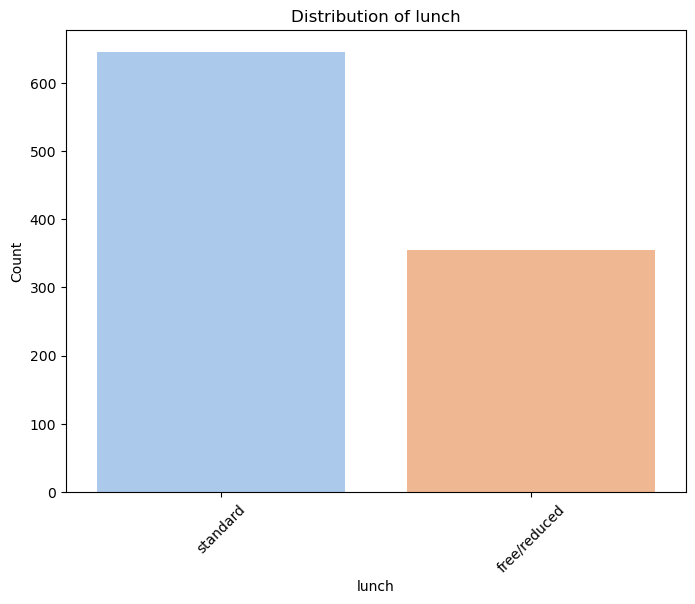

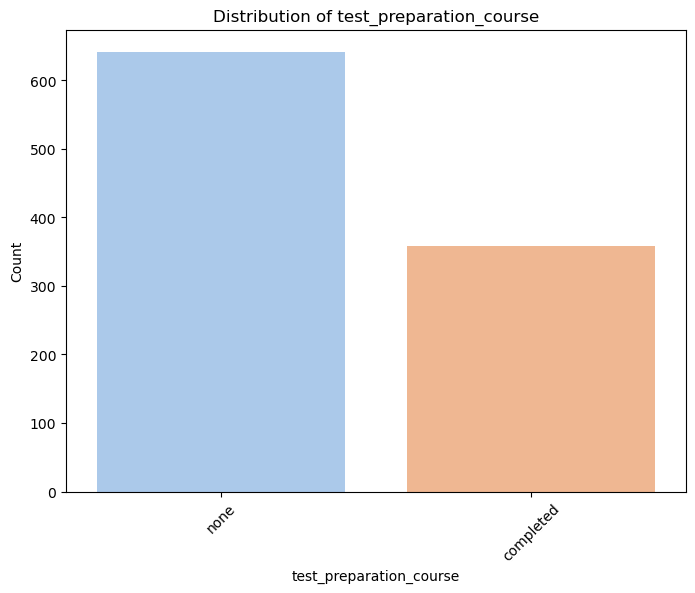

In [36]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='pastel')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

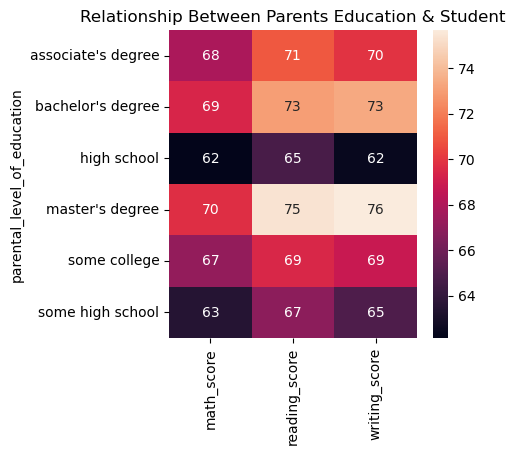

In [37]:
plt.figure(figsize=(4,4))
sns.heatmap(gp, annot = True)
plt.title("Relationship Between Parents Education & Student")
plt.show()

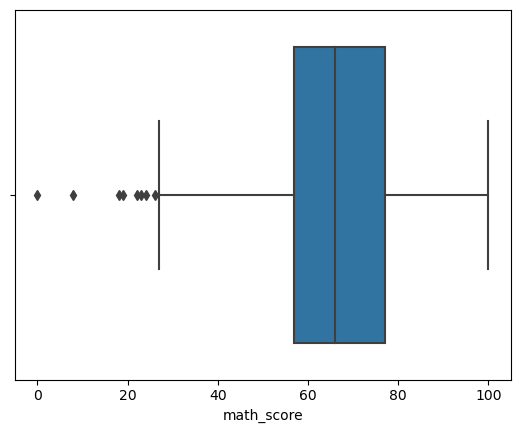

In [38]:
sns.boxplot(data=df,x="math_score")
plt.show()

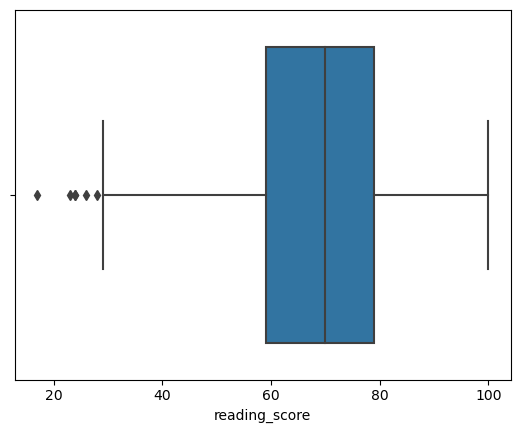

In [39]:
sns.boxplot(data = df, x="reading_score")
plt.show()

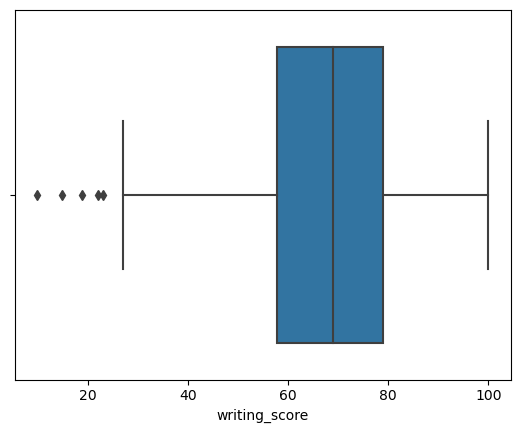

In [40]:
sns.boxplot(data = df, x="writing_score")
plt.show()

[89, 190, 319, 262, 140]


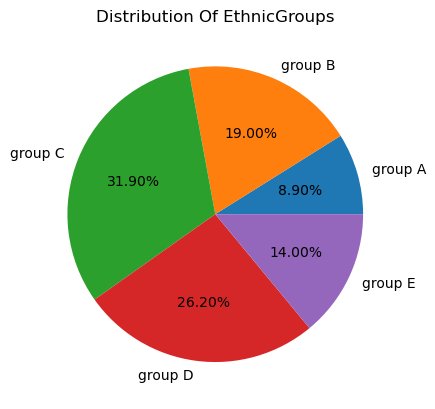

In [41]:
group_A = df.loc[(df['race_ethnicity'] == "group A")].count()
group_B = df.loc[(df['race_ethnicity'] == "group B")].count()
group_C = df.loc[(df['race_ethnicity'] == "group C")].count()
group_D = df.loc[(df['race_ethnicity'] == "group D")].count()
group_E = df.loc[(df['race_ethnicity'] == "group E")].count()

lbl = ["group A", "group B", "group C", "group D", "group E"]
Group_list = [group_A['race_ethnicity'], group_B['race_ethnicity'], group_C['race_ethnicity'], group_D['race_ethnicity'], group_E['race_ethnicity'] ]
print(Group_list)
plt.pie(Group_list, labels = lbl, autopct = "%1.2f%%")
plt.title("Distribution Of EthnicGroups")
plt.show()

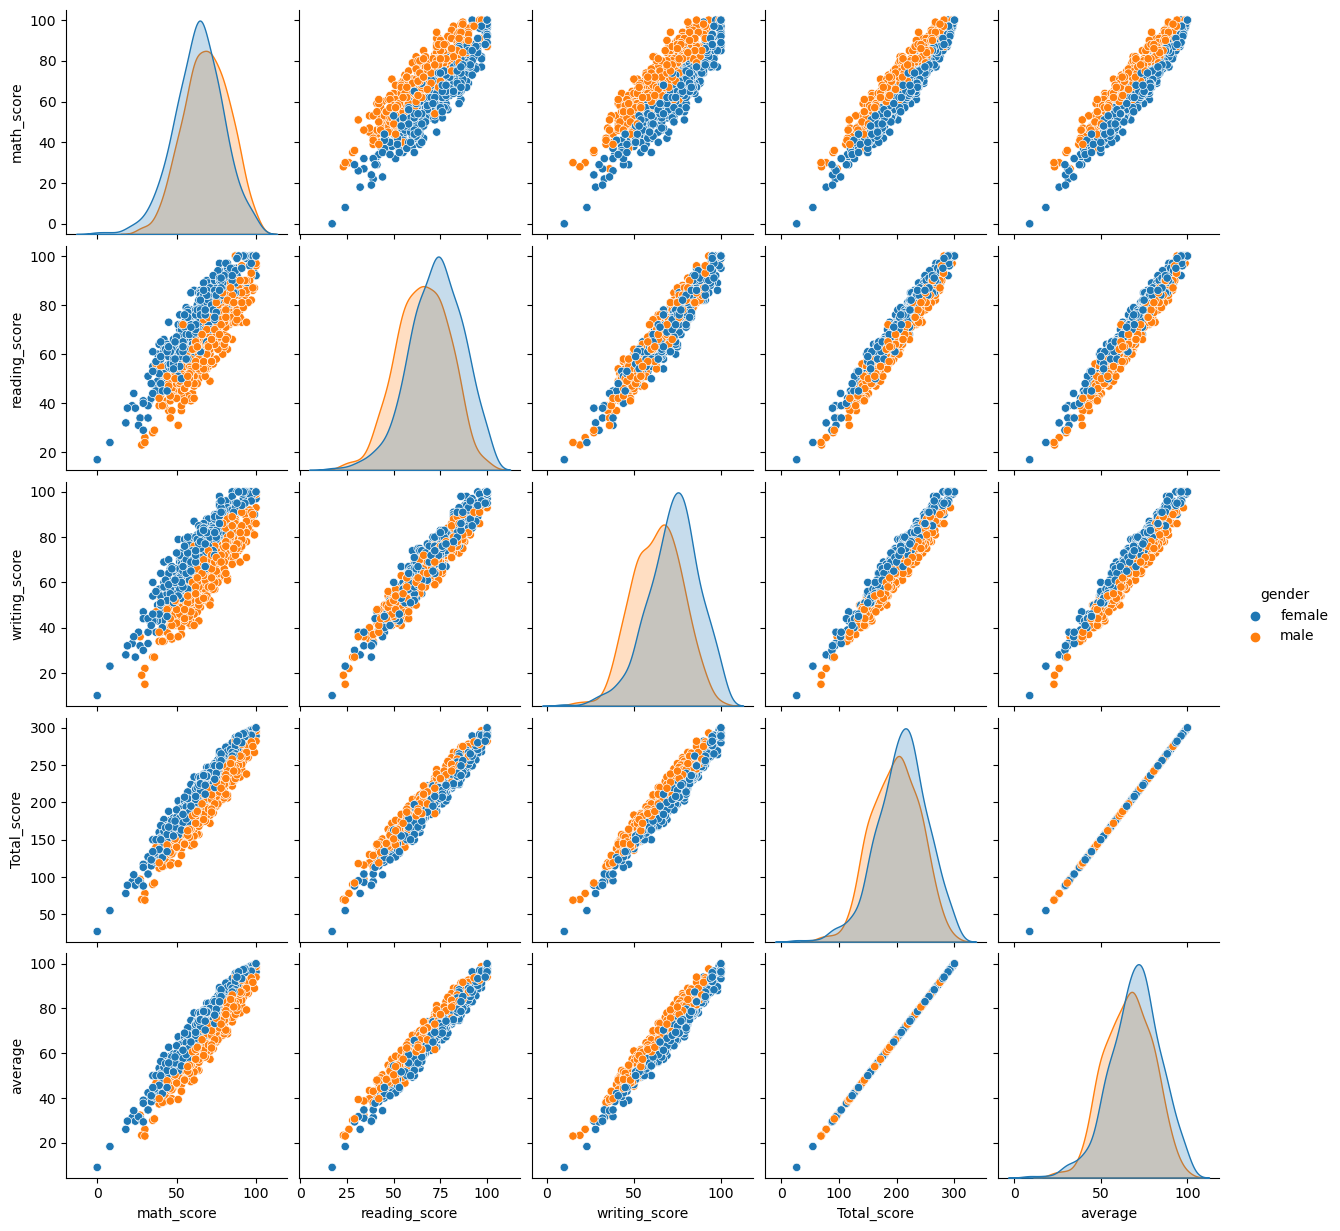

In [42]:
sns.pairplot(df,hue='gender')

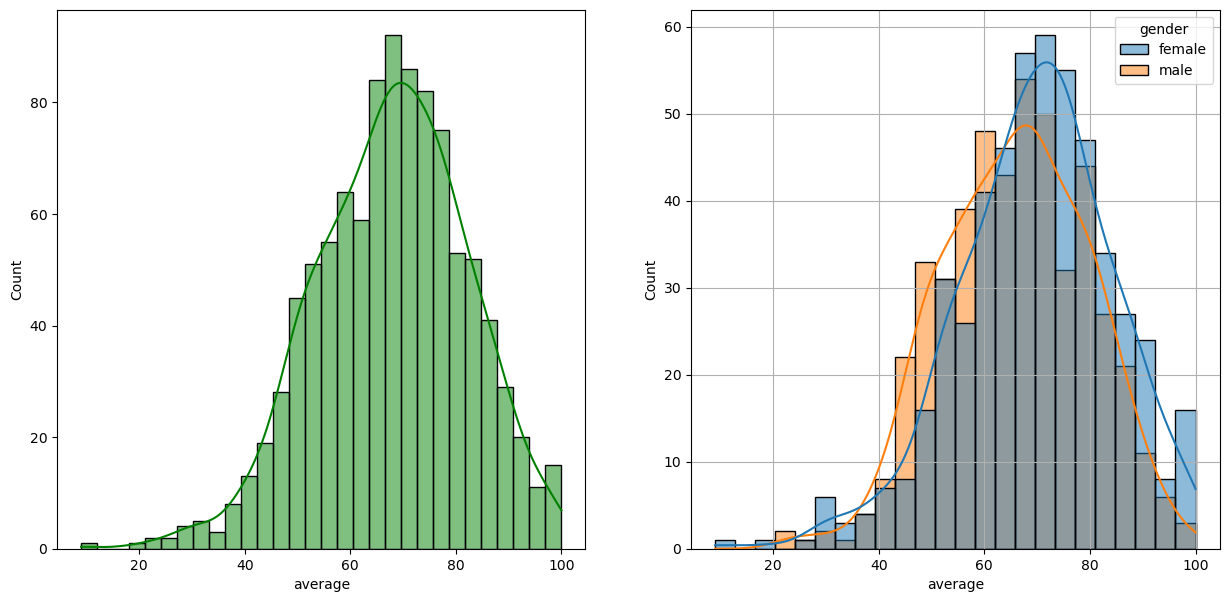

In [43]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.grid()
plt.show()

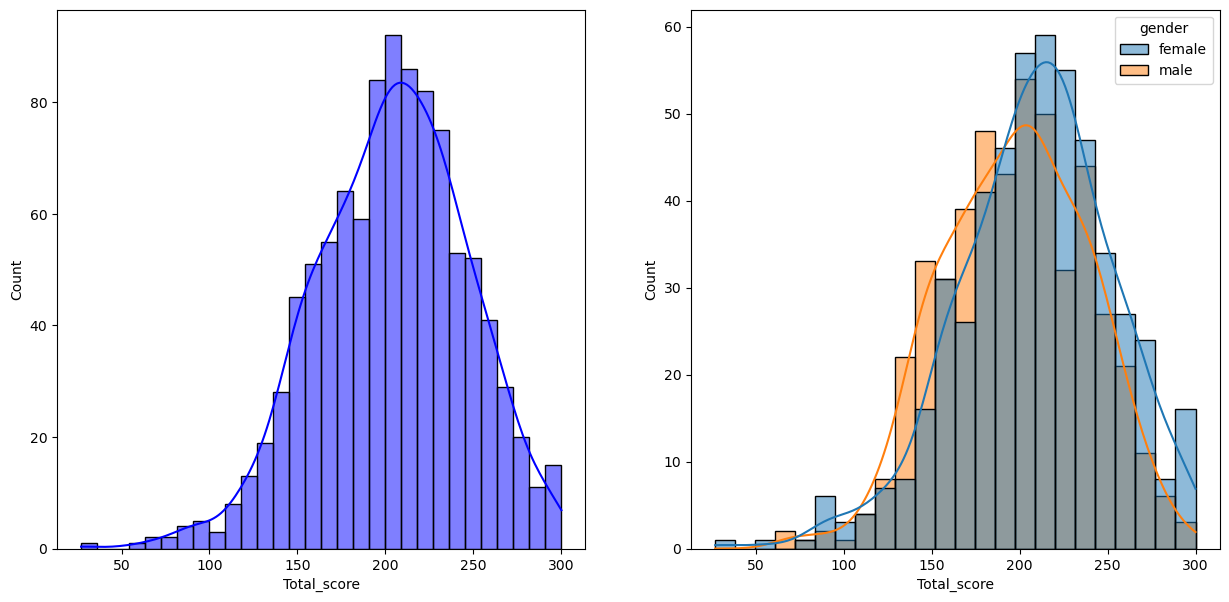

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_24828\3382387801.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\deepa\AppData\Local\Temp\ipykernel_24828\3382387801.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\deepa\AppData\Local\Temp\ipykernel_24828\3382387801.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


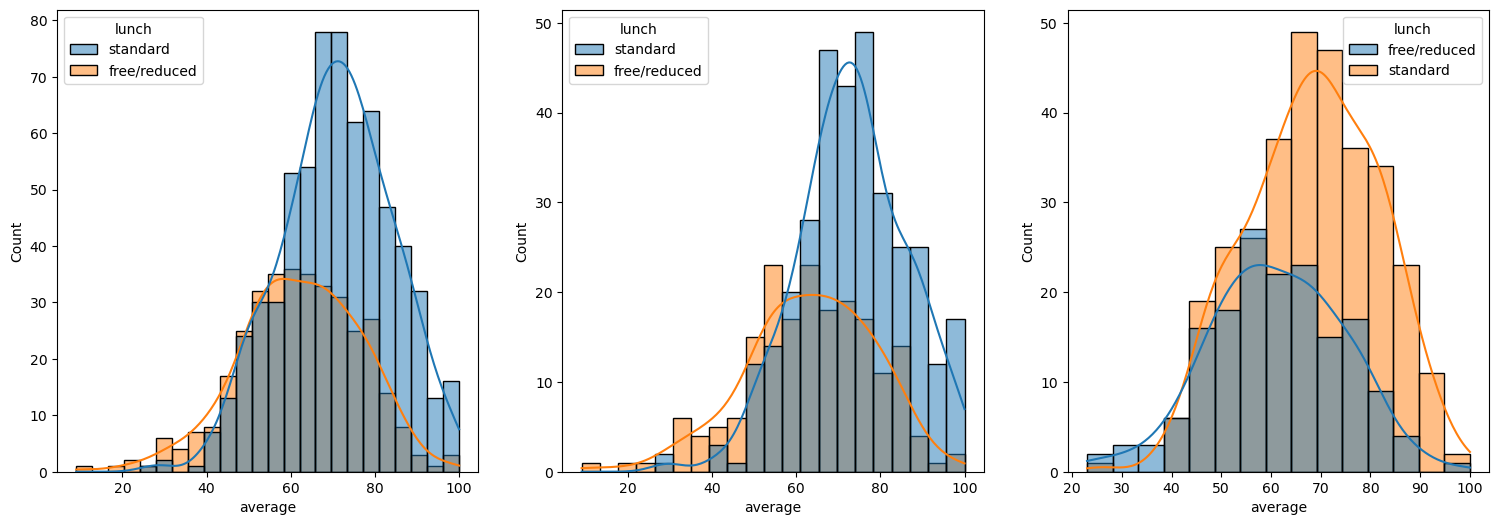

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_24828\1687493847.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\deepa\AppData\Local\Temp\ipykernel_24828\1687493847.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\deepa\AppData\Local\Temp\ipykernel_24828\1687493847.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


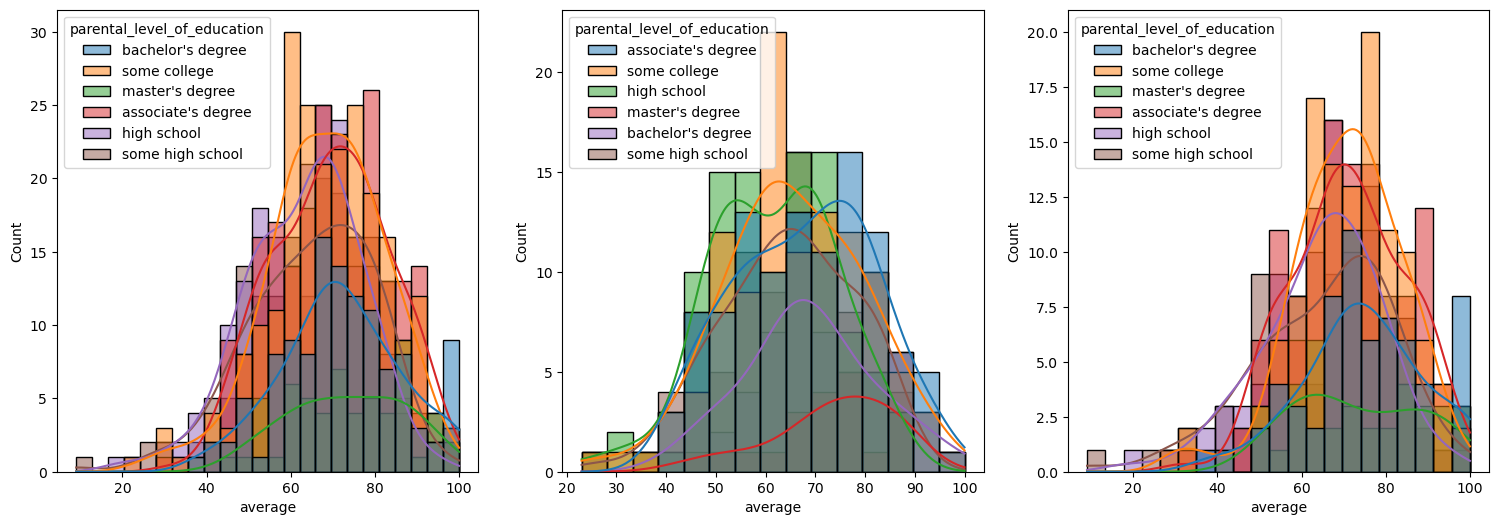

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [47]:
df.math_score.nunique()

81

In [48]:
df.reading_score.unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [49]:
my_df=pd.DataFrame({'column_name':list(df.columns),
                   'unique_values':[df[i].nunique() for i in list(df.columns)]})

In [50]:
display(my_df)

,column_name,unique_values
0,gender,2
1,race_ethnicity,5
2,parental_level_of_education,6
3,lunch,2
4,test_preparation_course,2
5,math_score,81
6,reading_score,72
7,writing_score,77
8,Total_score,194
9,average,194


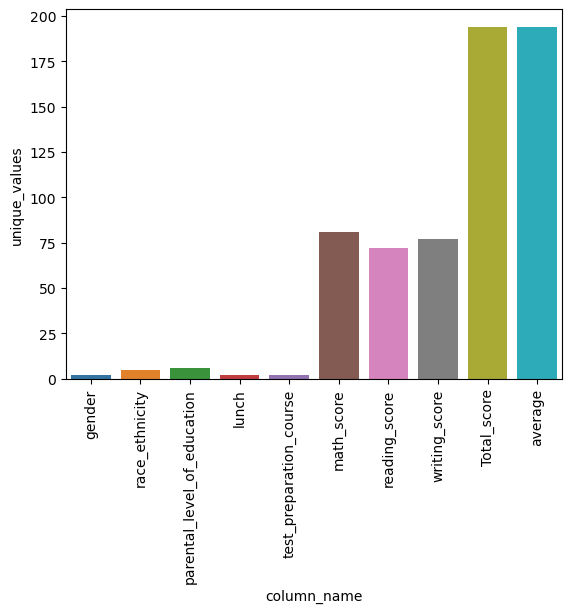

In [51]:
sns.barplot(x='column_name',y='unique_values',data=my_df)
plt.xticks(rotation=90)
plt.show()

# Question 8:-What is the distribution of scores across the three subjects?

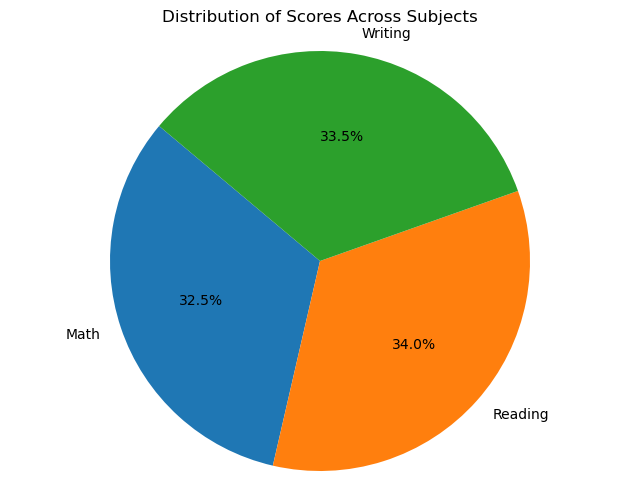

In [52]:
total_math_score=df['math_score'].sum()
total_reading_score=df['reading_score'].sum()
total_writing_score=df['writing_score'].sum()

labels=['Math','Reading','Writing']

scores=[total_math_score,total_reading_score,total_writing_score]

plt.figure(figsize=(8,6))
plt.pie(scores,labels=labels,autopct="%1.1f%%",startangle=140)
plt.title("Distribution of Scores Across Subjects")
plt.axis("equal")
plt.show()

# Question 9:- What is the distribution of gender within different parental education levels?

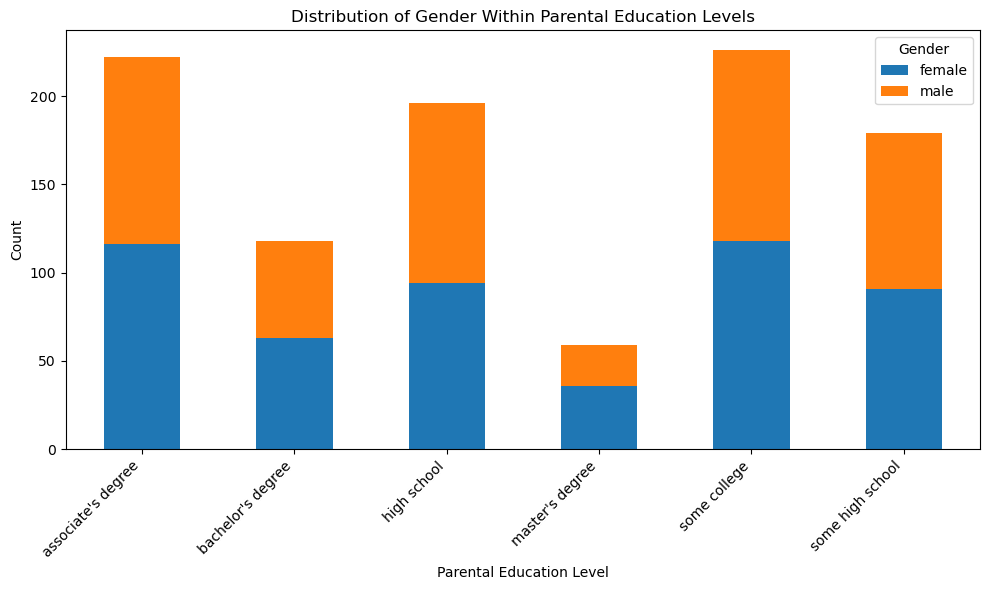

In [53]:

# Group the data by parental education level and gender, and count the occurrences
gender_distribution = df.groupby(['parental_level_of_education', 'gender']).size().unstack()

# Plot the stacked bar chart
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Gender Within Parental Education Levels')
plt.xlabel('Parental Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# Question10 :- How does parental education level correlate with students' performance in each subject?

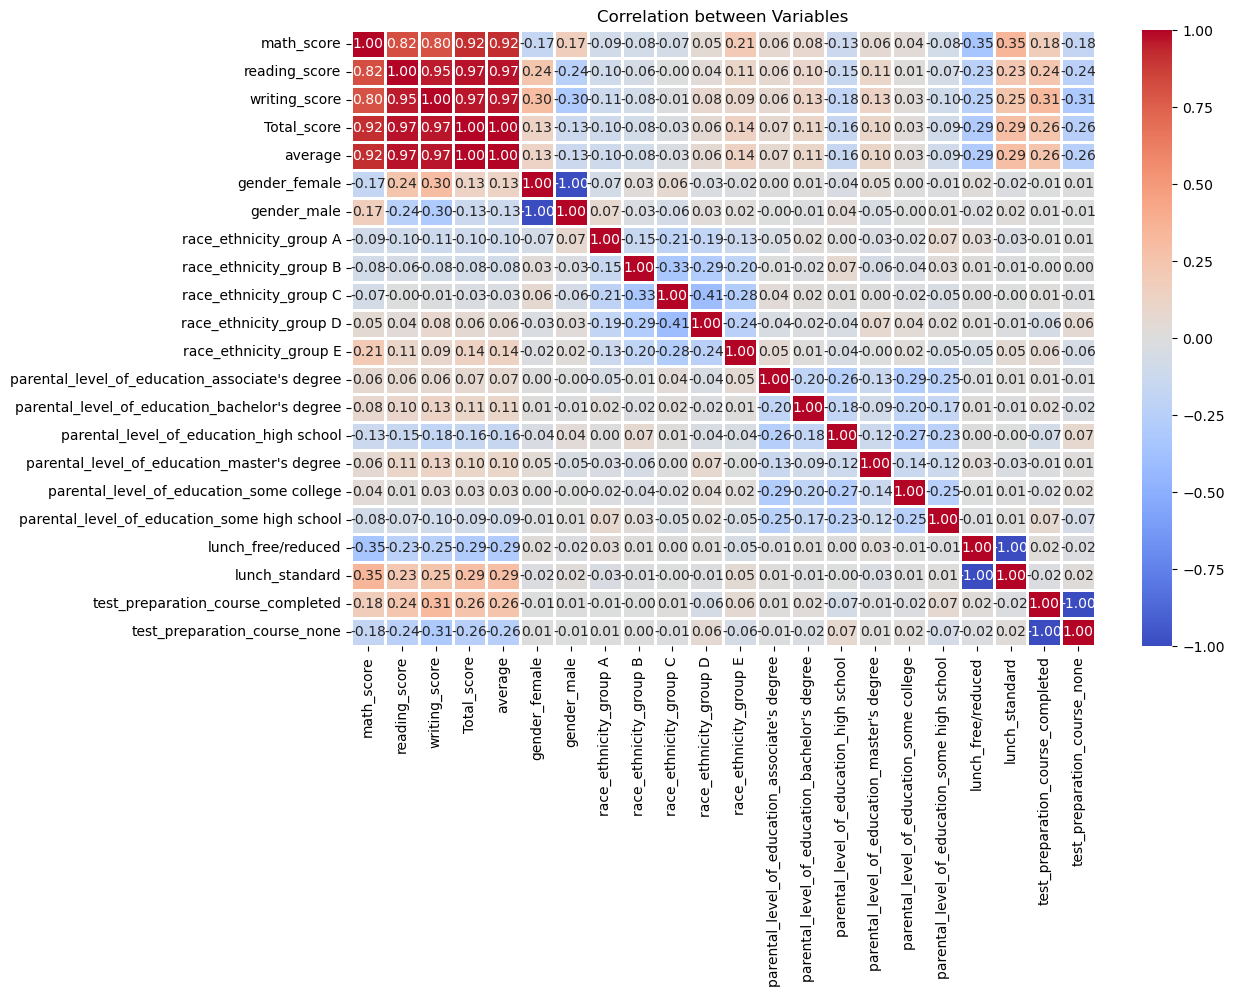

In [54]:
# Convert categorical variables to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title('Correlation between Variables')
plt.show()
